In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

In [ ]:
drought_df = pd.read_csv('/content/drive/MyDrive/archive (8)/train_timeseries/train_timeseries.csv')
drought_df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [ ]:
drought_df.isnull().sum()


fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

In [ ]:
# Removing the null values in the target variable as the drought score is only available for once in 7 days.
drought_df = drought_df.dropna()
drought_df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [ ]:
drought_df.dtypes


fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
dtype: object

In [ ]:
drought_df['year'] = pd.DatetimeIndex(drought_df['date']).year
drought_df['month'] = pd.DatetimeIndex(drought_df['date']).month
drought_df['day'] = pd.DatetimeIndex(drought_df['date']).day
drought_df['score'] = drought_df['score'].round().astype(int)
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int64
year             int64
month            int64
day              int64
dtype: object

In [ ]:
categorical_column_list = ['score','year','month','day']
drought_df_categorical = drought_df[['score','year','month','day']]

<Figure size 1000x4000 with 0 Axes>

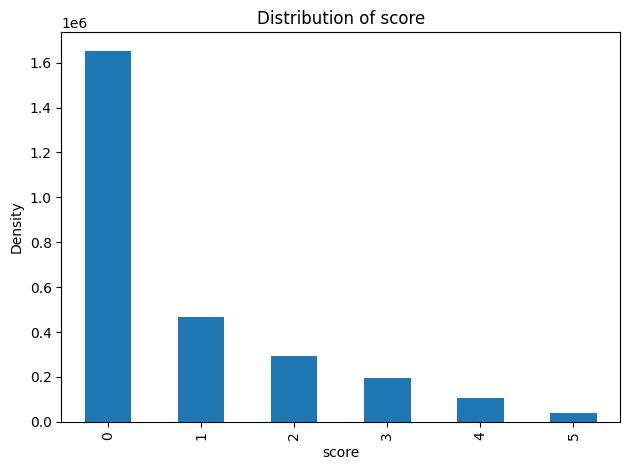

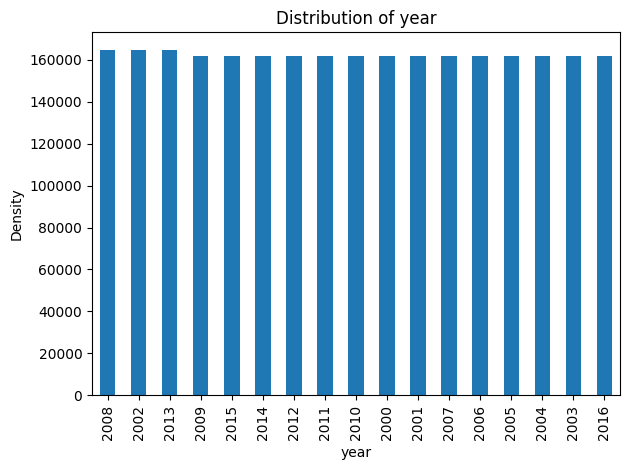

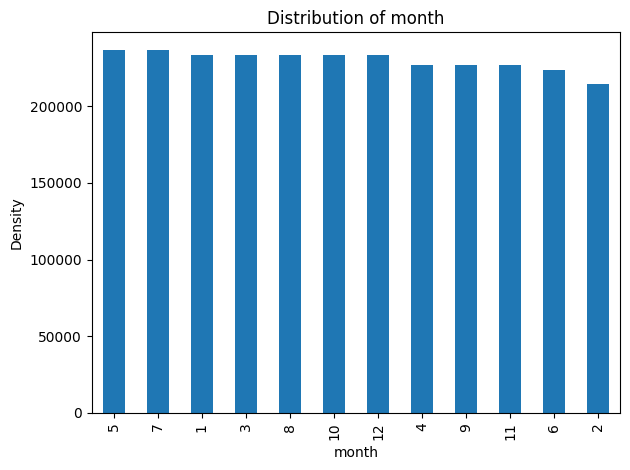

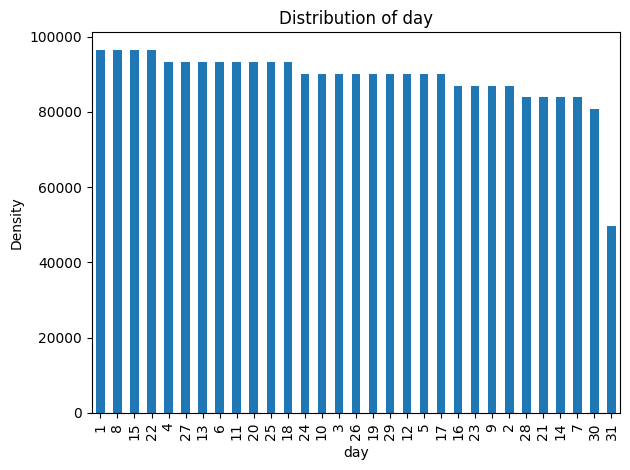

In [ ]:
# Distribution of categorical variables
plt.figure(figsize=(10,40))
for col_name in categorical_column_list:
    plt.figure()
    drought_df_categorical[col_name].value_counts().plot(kind = 'bar')
    x_name = col_name
    y_name = 'Density'
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))
    plt.tight_layout()

In [ ]:
drought_df_measures = drought_df[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']]
correlation_plot = drought_df_measures.corr()
correlation_plot.style.background_gradient(cmap = 'RdYlGn')

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
PRECTOT,1.000000,0.068775,0.245081,0.093258,0.231035,0.230975,0.026773,0.144929,-0.304171,0.089598,0.049730,0.060981,0.023346,0.065755,0.069057,0.079508,0.057816,0.047477
PS,0.068775,1.000000,0.282412,0.164160,0.341234,0.341252,0.111979,0.208285,-0.225935,0.163830,-0.080747,-0.135905,0.022932,-0.198332,-0.043315,-0.091821,0.036238,-0.154479
QV2M,0.245081,0.282412,1.000000,0.870242,0.959385,0.960434,0.804338,0.906144,-0.071547,0.862559,-0.225449,-0.256452,-0.108789,-0.269203,-0.205971,-0.249961,-0.081554,-0.246203
T2M,0.093258,0.164160,0.870242,1.000000,0.913530,0.914218,0.983356,0.981629,0.244357,0.997515,-0.207874,-0.220192,-0.125407,-0.209030,-0.193196,-0.206444,-0.112579,-0.159589
T2MDEW,0.231035,0.341234,0.959385,0.913530,1.000000,0.999970,0.854716,0.939934,-0.015643,0.905184,-0.238299,-0.268686,-0.115920,-0.280702,-0.204238,-0.245323,-0.082416,-0.239335
T2MWET,0.230975,0.341252,0.960434,0.914218,0.999970,1.000000,0.855401,0.940629,-0.015500,0.905911,-0.237971,-0.268292,-0.115882,-0.280199,-0.204143,-0.245147,-0.082497,-0.239029
T2M_MAX,0.026773,0.111979,0.804338,0.983356,0.854716,0.855401,1.000000,0.937762,0.407534,0.980101,-0.216764,-0.221671,-0.141911,-0.199614,-0.195727,-0.196236,-0.133234,-0.126331
T2M_MIN,0.144929,0.208285,0.906144,0.981629,0.939934,0.940629,0.937762,1.000000,0.065037,0.979134,-0.206382,-0.225829,-0.112878,-0.225256,-0.197991,-0.225744,-0.096593,-0.200157
T2M_RANGE,-0.304171,-0.225935,-0.071547,0.244357,-0.015643,-0.015500,0.407534,0.065037,1.000000,0.241564,-0.080163,-0.043127,-0.110952,0.018746,-0.041778,0.029737,-0.128844,0.163320
TS,0.089598,0.163830,0.862559,0.997515,0.905184,0.905911,0.980101,0.979134,0.241564,1.000000,-0.189823,-0.202713,-0.110273,-0.196015,-0.180665,-0.193347,-0.102367,-0.152434


In [ ]:
drought_df['year'] = pd.DatetimeIndex(drought_df['date']).year
drought_df['month'] = pd.DatetimeIndex(drought_df['date']).month
drought_df['day'] = pd.DatetimeIndex(drought_df['date']).day
drought_df['score'] = drought_df['score'].round().astype(int)
drought_df.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score            int64
year             int64
month            int64
day              int64
dtype: object

In [ ]:
independent_variables = drought_df.drop('score', 1)
independent_variables = independent_variables.drop('fips', 1)
independent_variables = independent_variables.drop('date', 1)
independent_variables.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
3,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,...,5.67,2.08,3.59,6.73,9.31,3.74,5.58,2000,1,4
10,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,...,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2000,1,11
17,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,...,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2000,1,18
24,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,...,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2000,1,25
31,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,...,2.74,0.88,1.86,4.18,6.38,1.27,5.11,2000,2,1


In [ ]:
target = drought_df['score']
target.head()

3     1
10    2
17    2
24    2
31    1
Name: score, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)


In [ ]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape (2205436, 21)
Train target shape (2205436,)
Test features shape (551360, 21)
Test target shape (551360,)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 2.21714261e+00,  9.57089223e-02,  1.50081031e+00, ...,
         2.04741496e-01,  1.00934752e+00, -3.05953840e-01],
       [-4.34665774e-01, -7.40190517e-01, -1.13222167e+00, ...,
        -1.02000952e+00, -1.31156897e+00, -5.33260874e-01],
       [-3.89747060e-01,  7.49731341e-01,  1.64061732e+00, ...,
         4.08866666e-01, -1.51110728e-01, -7.86468057e-02],
       ...,
       [-2.72637555e-01, -1.48423288e+00, -9.16156290e-01, ...,
        -6.11759181e-01, -1.31156897e+00, -1.66979604e+00],
       [-4.34665774e-01, -3.65652748e-02, -3.29390515e-01, ...,
         6.16326886e-04,  7.19232955e-01,  3.50067113e-02],
       [-3.88142820e-01,  9.73862619e-01,  2.25600940e-01, ...,
         6.12991835e-01, -1.02145441e+00, -8.74221425e-01]])

In [ ]:
model = RandomForestClassifier(n_estimators=10) # n_estimators is the hyperparameter
rfe = RFE(model, n_features_to_select=15) # n_features_to_select is chosen on a trial and error basis
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
selected_features = independent_variables.columns[(fit.get_support())]
print(selected_features)

Num Features: 15
Selected Features: [False  True  True  True  True False  True  True  True  True  True False
 False  True  True  True False  True  True False  True]
Feature Ranking: [4 1 1 1 1 3 1 1 1 1 1 5 6 1 1 1 2 1 1 7 1]
Index(['PS', 'QV2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
       'WS10M', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_RANGE', 'year',
       'day'],
      dtype='object')


In [ ]:
independent_variables = independent_variables.drop('PRECTOT', 1)
independent_variables = independent_variables.drop('T2MWET', 1)
independent_variables = independent_variables.drop('WS10M_MAX', 1)
independent_variables = independent_variables.drop('WS10M_MIN', 1)
independent_variables = independent_variables.drop('WS50M_MIN', 1)
independent_variables = independent_variables.drop('month', 1)
independent_variables.head()

X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Train features shape (2205436, 15)
Train target shape (2205436,)
Test features shape (551360, 15)
Test target shape (551360,)


#Fixing class imbalance


#Upsampling using SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a popular algorithm used for dealing with class imbalance problems in machine learning. SMOTE creates synthetic samples of the minority class by interpolating between neighboring samples of the same class. This results in a more balanced dataset that can be used for training a model.

Upsampling with SMOTE involves using the SMOTE algorithm to generate synthetic samples of the minority class in the training dataset. This process can help to balance the class distribution and improve the performance of a machine learning model on the minority class.

In [ ]:
sm = SMOTE(random_state = 5)
X_train_ures_SMOTE, y_train_ures_SMOTE = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))
print("Counts of label '2' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 2),sum(y_train_ures_SMOTE == 2)))
print("Counts of label '3' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 3),sum(y_train_ures_SMOTE == 3)))
print("Counts of label '4' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 4),sum(y_train_ures_SMOTE == 4)))
print("Counts of label '5' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 5),sum(y_train_ures_SMOTE == 5)))

Before OverSampling, the shape of train_X: (2205436, 15)
Before OverSampling, the shape of train_y: (2205436,) 

After OverSampling, the shape of train_X: (7924818, 15)
After OverSampling, the shape of train_y: (7924818,) 

Counts of label '0' - Before Oversampling:1320803, After OverSampling: 1320803
Counts of label '1' - Before Oversampling:373855, After OverSampling: 1320803
Counts of label '2' - Before Oversampling:236625, After OverSampling: 1320803
Counts of label '3' - Before Oversampling:157571, After OverSampling: 1320803
Counts of label '4' - Before Oversampling:85208, After OverSampling: 1320803
Counts of label '5' - Before Oversampling:31374, After OverSampling: 1320803


In [ ]:
#undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
#X_train_dres, y_train_dres = undersample.fit_resample(X_train, y_train)

In [ ]:
# print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
# print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

# print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres.shape))
# print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

# print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
# print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))
# print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres == 2)))
# print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres == 3)))
# print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres == 4)))
# print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres == 5)))

Before UnderSampling, the shape of train_X: (2205436, 15)
Before UnderSampling, the shape of train_y: (2205436,) 

After UnderSampling, the shape of train_X: (1746196, 15)
After UnderSampling, the shape of train_y: (1746196,) 

Counts of label '0' - Before UnderSampling:1320803, After UnderSampling: 1230970
Counts of label '1' - Before UnderSampling:373855, After UnderSampling: 226046
Counts of label '2' - Before UnderSampling:236625, After UnderSampling: 129001
Counts of label '3' - Before UnderSampling:157571, After UnderSampling: 84065
Counts of label '4' - Before UnderSampling:85208, After UnderSampling: 44740
Counts of label '5' - Before UnderSampling:31374, After UnderSampling: 31374


#Downsampling using Near Miss

NearMiss is a popular algorithm used for downsampling in machine learning. It works by selecting samples from the majority class that are "close" to samples in the minority class. This results in a more balanced dataset that can be used for training a model.

Downsampling with NearMiss involves using the NearMiss algorithm to select a subset of samples from the majority class in the training dataset. This process can help to balance the class distribution and improve the performance of a machine learning model on the minority class.

In [ ]:
undersample = NearMiss()
X_train_dres_nm, y_train_dres_nm = undersample.fit_resample(X_train, y_train)

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres_nm.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres_nm.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres_nm == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres_nm == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres_nm == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres_nm == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres_nm == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres_nm == 5)))

Before UnderSampling, the shape of train_X: (2205436, 15)
Before UnderSampling, the shape of train_y: (2205436,) 

After UnderSampling, the shape of train_X: (188244, 15)
After UnderSampling, the shape of train_y: (188244,) 

Counts of label '0' - Before UnderSampling:1320803, After UnderSampling: 31374
Counts of label '1' - Before UnderSampling:373855, After UnderSampling: 31374
Counts of label '2' - Before UnderSampling:236625, After UnderSampling: 31374
Counts of label '3' - Before UnderSampling:157571, After UnderSampling: 31374
Counts of label '4' - Before UnderSampling:85208, After UnderSampling: 31374
Counts of label '5' - Before UnderSampling:31374, After UnderSampling: 31374


#PCA for dimensionality reduction

#PCA on near miss downsampled data

In [ ]:
# pca = PCA()
# X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)
# X_test_NM_PCA_transformed = pca.transform(X_test)

In [ ]:
# print(pca.explained_variance_ratio_)

[4.52427047e-01 1.96800376e-01 9.24685658e-02 8.81612261e-02
 6.45364302e-02 4.48822682e-02 3.85415258e-02 1.02119415e-02
 7.08077711e-03 2.06625391e-03 1.48838993e-03 8.89425424e-04
 3.67252846e-04 7.85112441e-05 8.92766475e-09]


In [ ]:
# # choosing n value that explains >90% variance
# pca = PCA(n_components=5)
# X_train_dres_nm_PCAreduced = pca.fit_transform(X_train_dres_nm)
# X_test_NM_PCA_transformed = pca.transform(X_test)

In [ ]:
# print(pca.explained_variance_ratio_)

[0.45242705 0.19680038 0.09246857 0.08816123 0.06453643]


#PCA on SMOTE Upsampled Data

In [ ]:
# pca = PCA()
# X_train_ures_SMOTE_PCAreduced = pca.fit_transform(X_train_ures_SMOTE)
# X_test_SMOTE_PCA_transformed = pca.transform(X_test)

In [ ]:
# print(pca.explained_variance_ratio_)

[4.09305326e-01 2.24202289e-01 1.07716211e-01 6.47490391e-02
 6.42705962e-02 5.66380231e-02 4.98746620e-02 1.09249196e-02
 7.27465485e-03 2.21952830e-03 1.48919785e-03 8.85319555e-04
 3.76755933e-04 7.34731926e-05 4.81116498e-09]


In [ ]:
# # choosing n value that explains >90% variance
# pca = PCA(n_components=5)
# X_train_ures_SMOTE_PCAreduced = pca.fit_transform(X_train_ures_SMOTE)
# X_test_SMOTE_PCA_transformed = pca.transform(X_test)

In [ ]:
# print(pca.explained_variance_ratio_)

#LDA for dimensionality reduction
LDA on near miss downsampled data

In [ ]:
# lda=LDA(n_components=5)
# X_train_dres_nm_LDAreduced=lda.fit_transform(X_train_dres_nm,y_train_dres_nm)
# X_test_NM_LDA_transformed=lda.transform(X_test)

In [ ]:
# print("Train features shape", X_train.shape)
# print("LDA Dimensionality reduced features shape on Near Miss downsampled data", X_train_dres_nm_LDAreduced.shape)
# print("LDA Dimensionality reduced features shape on test data", X_test_NM_LDA_transformed.shape)

#LDA on SMOTE Upsampled Data


In [ ]:
# lda=LDA(n_components=5)
# X_train_ures_SMOTE_LDAreduced=lda.fit_transform(X_train_ures_SMOTE,y_train_ures_SMOTE)
# X_test_SMOTE_LDA_transformed=lda.transform(X_test)

In [ ]:
# print("Train features shape", X_train.shape)
# print("LDA Dimensionality reduced features shape on SMOTE Upsampled data", X_train_ures_SMOTE_LDAreduced.shape)
# print("LDA Dimensionality reduced features shape on test data", X_test_NM_LDA_transformed.shape)

#Random Forest without Resampling

Random Forest is a powerful machine learning algorithm used for classification, regression, and feature selection tasks. It is an ensemble learning technique that constructs a multitude of decision trees at training time and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
print('Performance of RF Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))
print('Accuracy:',accuracy_score(y_test, y_pred_RF))
print('Precision:',precision_score(y_test, y_pred_RF, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_RF, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_RF, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_RF))

Performance of RF Algorithm without resampling:

[[318865  10788   1177    437    138     22]
 [ 33950  50337   7515   1014    240     33]
 [ 12453   9470  30665   5450    602     66]
 [  6632   1974   6559  20706   3192    168]
 [  2847    707   1142   4033  11295   1033]
 [  1006    241    254    370   1474   4505]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90    331427
           1       0.68      0.54      0.60     93089
           2       0.65      0.52      0.58     58706
           3       0.65      0.53      0.58     39231
           4       0.67      0.54      0.59     21057
           5       0.77      0.57      0.66      7850

    accuracy                           0.79    551360
   macro avg       0.71      0.61      0.65    551360
weighted avg       0.78      0.79      0.78    551360

Accuracy: 0.7914484184561811
Precision: 0.7772108449872397
Recall: 0.7914484184561811
F1 Score: 0.7791354605578688
Cohen Kappa Score: 0.6

#KNN with SMOTE upsampling

K-Nearest Neighbors (KNN) is a non-parametric machine learning algorithm used for both classification and regression tasks. KNN works by finding the K closest neighbors to a given data point and then classifying or predicting the outcome based on the majority class or average value of the K neighbors.
Using SMOTE with KNN involves first applying the SMOTE technique to the imbalanced dataset to generate synthetic samples of the minority class. The new, balanced dataset is then used as input to the KNN algorithm for classification or regression.

In [ ]:
knn_classifier_SMOTE = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_SMOTE.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)
y_pred_knn_SMOTE = knn_classifier_SMOTE.predict(X_test)

In [ ]:
pickle.dump(knn_classifier_SMOTE, open('knn_classifier_SMOTE.pkl', 'wb'))

In [ ]:
print('Performance of KNN Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_SMOTE))
print(classification_report(y_test, y_pred_knn_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_SMOTE))
print('Precision:',precision_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_SMOTE))

Performance of KNN Algorithm with SMOTE Upsampling:

[[299284  22438   5230   2637   1400    438]
 [ 17245  60810  11695   2235    847    257]
 [  3049  10458  35979   7664   1279    277]
 [  1251   1694   7368  23882   4622    414]
 [   453    495    935   4266  13139   1769]
 [   136     87    161    309   1643   5514]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92    331427
           1       0.63      0.65      0.64     93089
           2       0.59      0.61      0.60     58706
           3       0.58      0.61      0.60     39231
           4       0.57      0.62      0.60     21057
           5       0.64      0.70      0.67      7850

    accuracy                           0.80    551360
   macro avg       0.66      0.68      0.67    551360
weighted avg       0.80      0.80      0.80    551360

Accuracy: 0.7955020313406849
Precision: 0.8014971918510334
Recall: 0.7955020313406849
F1 Score: 0.7982279179675522
Cohen Kappa Score:

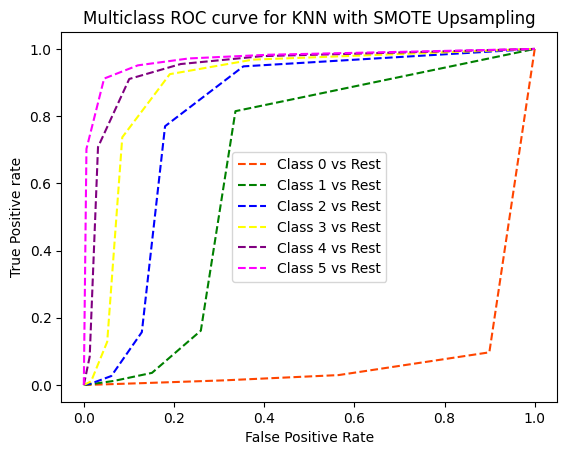

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_knn_SMOTE, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with SMOTE Upsampling',dpi=300)

#Decision Tree Algorithm with SMOTE Upsampling

Decision tree algorithm is a popular machine learning algorithm used for classification and regression tasks. Decision tree algorithms construct a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility.
Using SMOTE with decision tree algorithm involves first applying the SMOTE technique to the imbalanced dataset to generate synthetic samples of the minority class. The new, balanced dataset is then used as input to the decision tree algorithm for classification or regression.

In [ ]:
DT_classifier_SMOTE = tree.DecisionTreeClassifier(criterion='gini', max_depth=70)
DT_classifier_SMOTE.fit(X_train_ures_SMOTE,y_train_ures_SMOTE)
y_pred_SMOTE = DT_classifier_SMOTE.predict(X_test)

In [ ]:
pickle.dump(DT_classifier_SMOTE, open('DT_classifier_SMOTE.pkl', 'wb'))


In [ ]:
print('Performance of Decision Tree Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_SMOTE))
print(classification_report(y_test, y_pred_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_SMOTE))
print('Precision:',precision_score(y_test, y_pred_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_SMOTE))

Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[289797  26164   8331   4380   2003    752]
 [ 20493  56708  11457   2860   1202    369]
 [  4686  11149  33538   7340   1623    370]
 [  1952   2308   7662  22334   4432    543]
 [   712    705   1316   4372  12292   1660]
 [   192    162    237    398   1668   5193]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89    331427
           1       0.58      0.61      0.60     93089
           2       0.54      0.57      0.55     58706
           3       0.54      0.57      0.55     39231
           4       0.53      0.58      0.56     21057
           5       0.58      0.66      0.62      7850

    accuracy                           0.76    551360
   macro avg       0.61      0.64      0.63    551360
weighted avg       0.77      0.76      0.77    551360

Accuracy: 0.7615024666279745
Precision: 0.7703493349557479
Recall: 0.7615024666279745
F1 Score: 0.7654637257126385
Cohen Ka

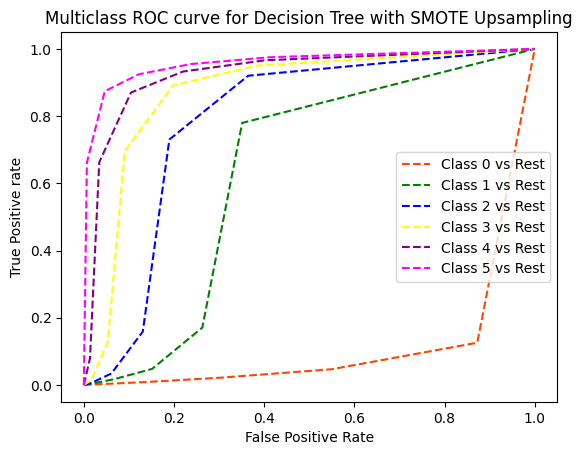

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_SMOTE, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling',dpi=300)

#Naive Bayes without Resampling

Naive Bayes is a classification algorithm that makes use of Bayes' theorem to predict the probability of a data point belonging to a particular class. The algorithm assumes that the features of the data point are conditionally independent of each other given the class label, which is why it is called "naive".

When it comes to building a Naive Bayes model without resampling, we would typically split the data into training and testing sets. The training set would be used to fit the Naive Bayes model, while the testing set would be used to evaluate the model's performance.

To fit a Naive Bayes model, we would first calculate the prior probabilities of each class by dividing the number of data points in each class by the total number of data points. Then, for each feature in the data set, we would calculate the conditional probability of the feature given the class label. This involves counting the number of times each feature appears in each class, and dividing it by the total number of data points in that class.

In [ ]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_pred_NB = NB_classifier.predict(X_test)

In [ ]:
pickle.dump(NB_classifier, open('NB_classifier.pkl', 'wb'))


In [ ]:
print('Performance of Naive Bayes Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_NB))
print(classification_report(y_test, y_pred_NB))
print('Accuracy:',accuracy_score(y_test, y_pred_NB))
print('Precision:',precision_score(y_test, y_pred_NB, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NB, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NB, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NB))

Performance of Naive Bayes Algorithm without resampling:

[[309246   4913   4570   7945   3202   1551]
 [ 80305   2721   2324   5149   1720    870]
 [ 48125   2255   1689   4275   1509    853]
 [ 29659   1782   1297   4042   1397   1054]
 [ 14975   1155    685   2488    832    922]
 [  5717    323    212    430    249    919]]
              precision    recall  f1-score   support

           0       0.63      0.93      0.75    331427
           1       0.21      0.03      0.05     93089
           2       0.16      0.03      0.05     58706
           3       0.17      0.10      0.13     39231
           4       0.09      0.04      0.06     21057
           5       0.15      0.12      0.13      7850

    accuracy                           0.58    551360
   macro avg       0.23      0.21      0.19    551360
weighted avg       0.45      0.58      0.48    551360

Accuracy: 0.5793837057457922
Precision: 0.450035672646744
Recall: 0.5793837057457922
F1 Score: 0.48055511715254784
Cohen Kappa S

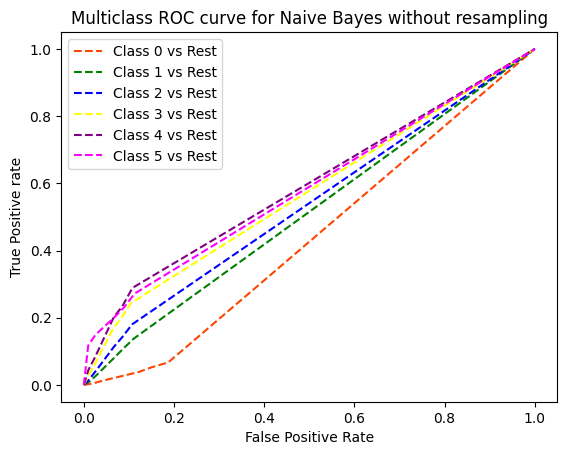

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NB, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Naive Bayes without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Naive Bayes without resampling',dpi=300)

#Decision Tree Algorithm with Near Miss Downsampling

A decision tree is a machine learning algorithm that can be used for classification or regression tasks. It builds a tree-like model of decisions and their possible consequences, where each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label or a predicted value.
To apply near miss downsampling with a decision tree, you would first split your dataset into training and testing sets. Then, you would apply the near miss downsampling technique to the training set, to reduce the imbalance between the classes. You would then train the decision tree on the downsampled training set and evaluate its performance on the testing set.

In [ ]:
DT_classifier_NM = tree.DecisionTreeClassifier(criterion='gini')
DT_classifier_NM.fit(X_train_dres_nm,y_train_dres_nm)
y_pred_NM = DT_classifier_NM.predict(X_test)

In [ ]:
pickle.dump(DT_classifier_NM, open('DT_classifier_NM.pkl', 'wb'))


In [ ]:
print('Performance of Decision Tree Algorithm with Near Miss Downsampling:\n')
print(confusion_matrix(y_test, y_pred_NM))
print(classification_report(y_test, y_pred_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_NM))
print('Precision:',precision_score(y_test, y_pred_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM))

Performance of Decision Tree Algorithm with Near Miss Downsampling:

[[61150 64631 64014 51704 42391 47537]
 [ 9629 20692 18371 15572 13121 15704]
 [ 3955  8186 14820 11607  8990 11148]
 [ 1809  3761  6383 11361  7281  8636]
 [  615  1150  2080  3888  7612  5712]
 [   93   154   277   482  1540  5304]]
              precision    recall  f1-score   support

           0       0.79      0.18      0.30    331427
           1       0.21      0.22      0.22     93089
           2       0.14      0.25      0.18     58706
           3       0.12      0.29      0.17     39231
           4       0.09      0.36      0.15     21057
           5       0.06      0.68      0.10      7850

    accuracy                           0.22    551360
   macro avg       0.24      0.33      0.19    551360
weighted avg       0.54      0.22      0.25    551360

Accuracy: 0.21934670632617528
Precision: 0.5390961932151407
Recall: 0.21934670632617528
F1 Score: 0.25477065298206447
Cohen Kappa Score: 0.07602968628233

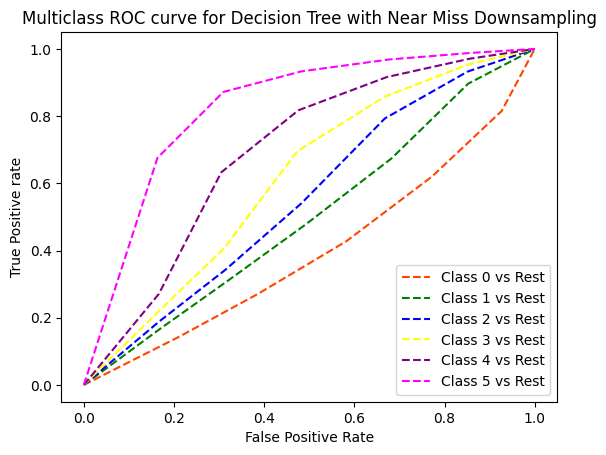

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(6):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_NM, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling',dpi=300)

#Ranking All the models implemented on the basis of Accuracy and Cohen Kappa Score

In [ ]:
data = [
{'Algorithm':'Random Forest without Resampling:' ,'Accuracy':0.791448,'Precision':0.777210,'Recall':0.791448,'F1 Score':0.779195,'Cohen Kappa Score':0.623035},
{'Algorithm':'Naive Bayes without Resampling','Accuracy':0.579383,'Precision':0.450036,'Recall':0.579383,'F1 Score':0.480551,'Cohen Kappa Score':0.051454},
{'Algorithm':'Decision Tree with SMOTE Upsampling:','Accuracy':0.761502,'Precision':0.770349,'Recall':0.761502,'F1 Score':0.765463,'Cohen Kappa Score':0.605419},
{'Algorithm':'KNN with SMOTE Upsampling:','Accuracy':0.795502,'Precision':0.801497,'Recall':0.795502,'F1 Score':0.798227,'Cohen Kappa Score':0.659871},
{'Algorithm':'Decision Tree Algorithm with Near Miss Downsampling:','Accuracy':0.219346,'Precision':0.539096,'Recall':0.219346,'F1 Score':0.254776,'Cohen Kappa Score':0.076029}]
performance_metrics = pd.DataFrame(data)
performance_metrics.sort_values(by=['Accuracy', 'Cohen Kappa Score'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score,Cohen Kappa Score
3,KNN with SMOTE Upsampling:,0.795502,0.801497,0.795502,0.798227,0.659871
0,Random Forest without Resampling:,0.791448,0.777210,0.791448,0.779195,0.623035
2,Decision Tree with SMOTE Upsampling:,0.761502,0.770349,0.761502,0.765463,0.605419
1,Naive Bayes without Resampling,0.579383,0.450036,0.579383,0.480551,0.051454
4,Decision Tree Algorithm with Near Miss Downsam...,0.219346,0.539096,0.219346,0.254776,0.076029
